#### **2024 Malaysia's Consumers Price Index**

**Project Overview**

**Objective :** \
Analyze consumer price index in Malaysia across various dimensions like division, state, and time.

**Dataset Source :** \
*data.gov.my*

**Goal :** \
Provide actionable insights into consumer price index changes over time and their distribution across different categories.


##### Import Libraries

In [41]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.7,
    'legend.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Predictive Model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

##### Data Collection

Loading Dataset

The dataset is stored in a parquet file. \
It contains details such as state, date, division, and CPI index values.

In [42]:
# Fetching dataset from official website

URL_DATA = 'https://storage.dosm.gov.my/cpi/cpi_2d_state.parquet'
df = pd.read_parquet(URL_DATA)

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [43]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
                             date         index
count                       39872  39872.000000
mean   2017-05-16 21:02:01.348314    114.102186
min           2010-01-01 00:00:00     74.100000
25%           2013-09-01 00:00:00    102.200000
50%           2017-05-16 12:00:00    110.700000
75%           2021-02-01 00:00:00    120.700000
max           2024-10-01 00:00:00    187.300000
std                           NaN     17.011587

Total Rows: 39872 
Total Columns: 4

Missing Data per Column: 
state       0
date        0
division    0
index       0
dtype: int64

Duplicate Data per Column: 
0

Head: 
   state       date division  index
0  Johor 2010-01-01  overall   99.4
1  Johor 2010-02-01  overall   99.4
2  Johor 2010-03-01  overall   99.4
3  Johor 2010-04-01  overall   99.4
4  Johor 2010-05-01  overall   99.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39872 entries, 0 to 39871
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
--- 

In [44]:
"""
Convert data types
"""
df['index'] = df['index'].astype('int64')
df['date'] = pd.to_datetime(df['date'])

In [45]:
# Mapping 'division' codes to readable names
division_map ={
    '01': 'Food & Beverages',
    '02': 'Alcoholic Beverages & Tobacco',
    '03': 'Clothing & Footwear',
    '04': 'Housing, Utilities & Gas',
    '05': 'Household Furnishing, Equipment & Maintenance ',
    '06': 'Health',
    '07': 'Transport',
    '08': 'Information & Communication',
    '09': 'Recreation, Sport & Culture',
    '10': 'Education',
    '11': 'Restaurant & Accomodation Service',
    '12': 'Insurance & Financial Service',
    '13': 'Personal Care, Social Protection, Miscellaneous Good & Service',
    'overall' : 'Overall'
}

In [46]:
"""
Assign new column
"""
# Assign new column for 'division'
df['category'] = df['division'].map(division_map)

##### Exploratory Data Analysis

In [47]:
# Overview of dataset
df.head()

,state,date,division,index,category
0,Johor,2010-01-01,overall,99,Overall
1,Johor,2010-02-01,overall,99,Overall
2,Johor,2010-03-01,overall,99,Overall
3,Johor,2010-04-01,overall,99,Overall
4,Johor,2010-05-01,overall,99,Overall


Analyzing dy Date \
Identify seasonal patterns or significant changes over time

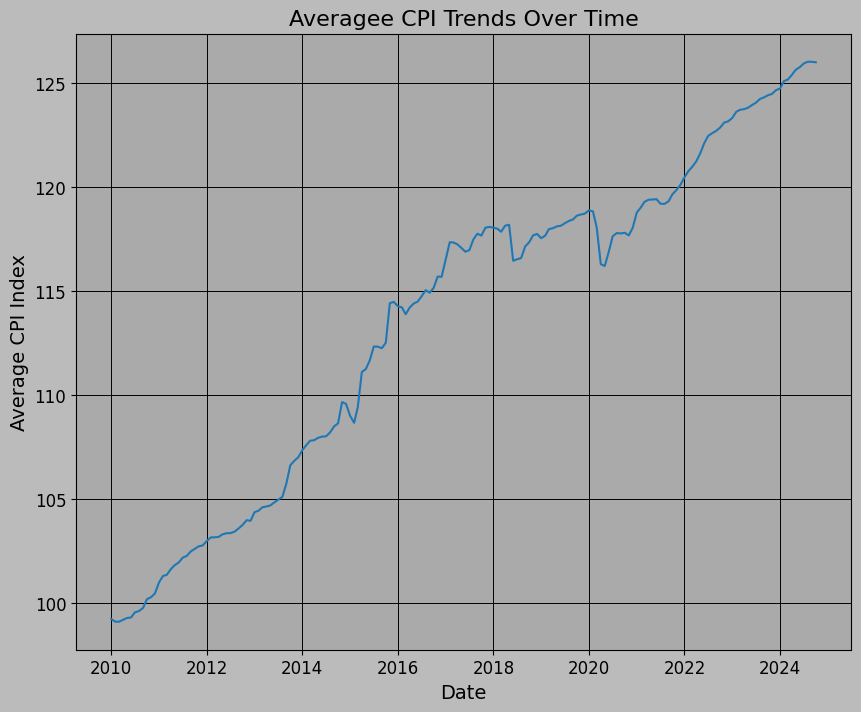

In [48]:
# Average CPI distribution over time

sns.lineplot(df.groupby('date')['index'].mean(),
             palette='coolwarm')
plt.title('Averagee CPI Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average CPI Index')
plt.grid(True)
plt.show()

Analyzing by Division \
Identify which division with the highest and lowest CPI average

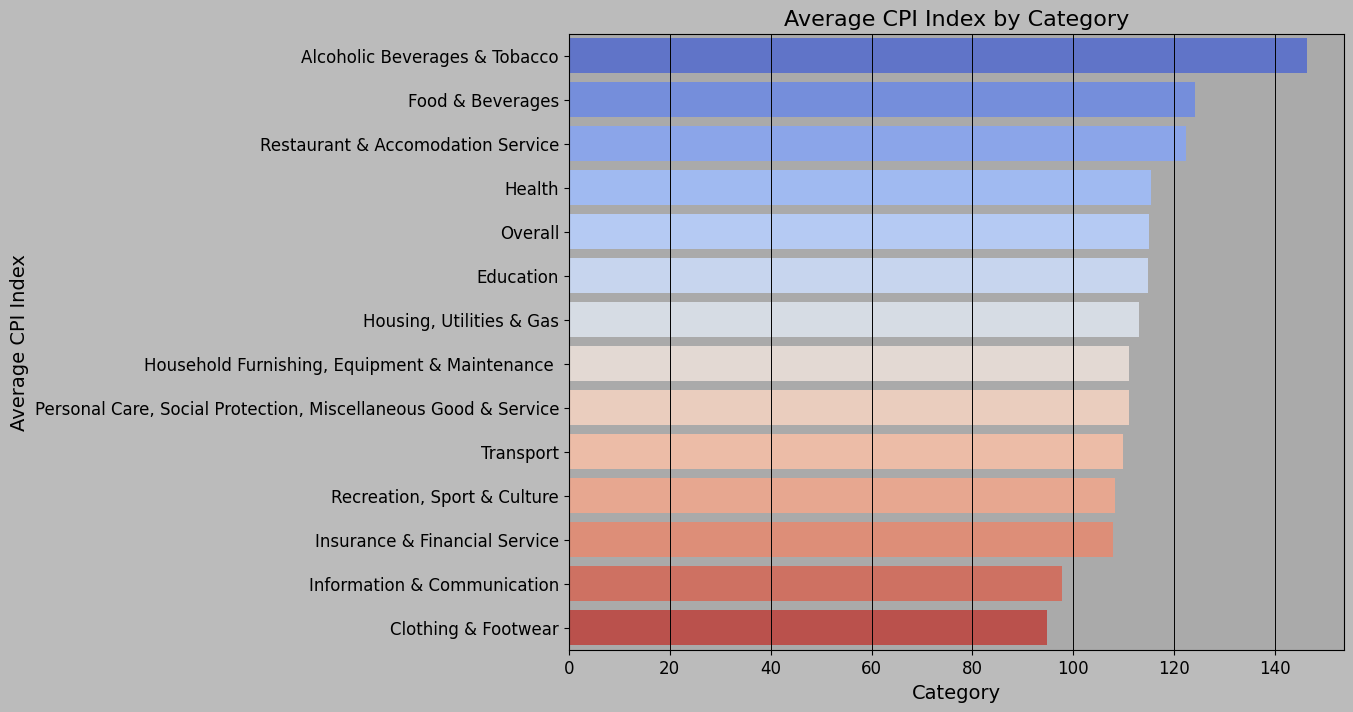

In [49]:
# Average CPI by Category/Division

sns.barplot(df.groupby('category')['index'].mean().sort_values(ascending=False),
            orient='h', palette='coolwarm')
plt.title('Average CPI Index by Category')
plt.xlabel('Category')
plt.ylabel('Average CPI Index')
plt.grid(axis='x')
plt.show()

Analyzing by State \
Identify which state with the highest and lowest CPI average

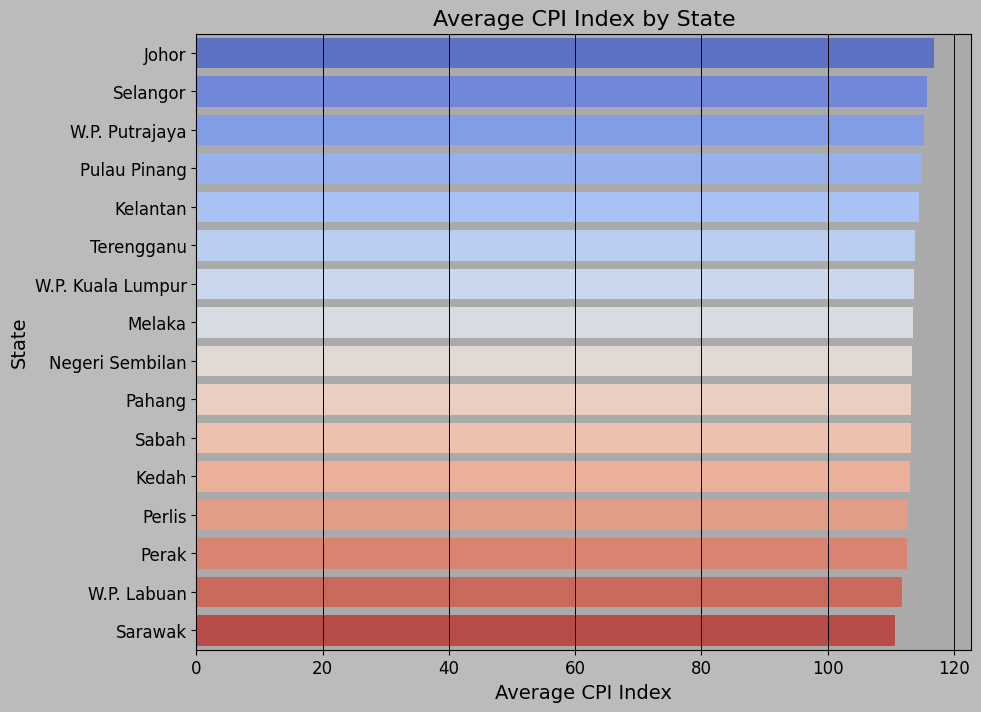

In [50]:
# Average CPI by State

sns.barplot(df.groupby('state')['index'].mean().sort_values(ascending=False),
            orient='h', palette='coolwarm')
plt.title('Average CPI Index by State')
plt.xlabel('Average CPI Index')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

Correlation Matrix \
Visualizing correlations to understand their relationships.


In [51]:
# Convert all columns to numericals value
df_copy = df.copy()
df_copy = df_copy.apply(lambda col: col.astype('category').cat.codes if col.dtypes=='object' else col)

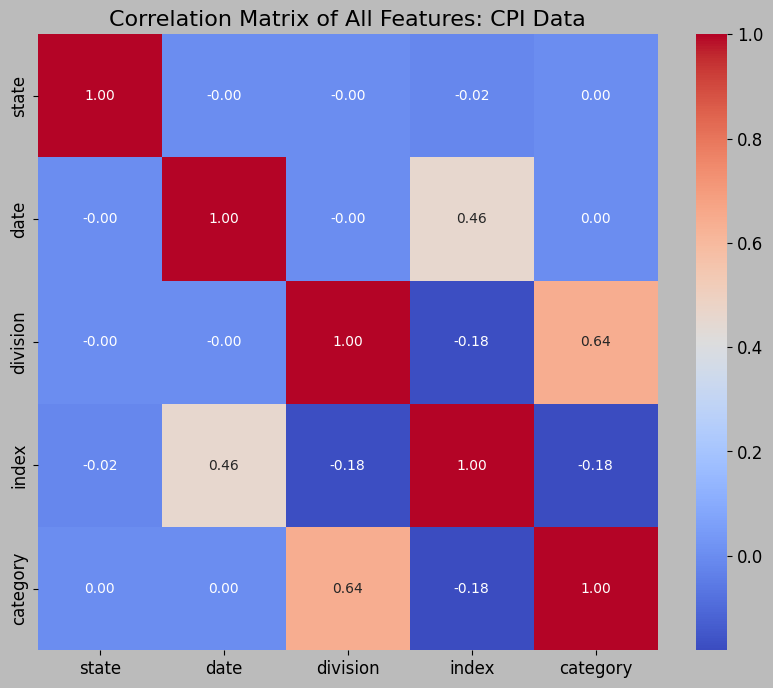

In [52]:
# Correlation Matrix of All Features

sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features: CPI Data')
plt.show()

Insights and Summary

- The CPI index trends overt time is positively moving uptrends
-  *Johor*, *Selangor*, *Putrajaya*, *Pulau Pinang* and *Kelantan* are 5 state with highest average CPI
- All states have equal CPI index distribution at range of *100-120*
- *Alcoholic Beverage & Tobbaco*, *Food & Beverage*, *Restaurant & Accomodation* and *Health* are most performed in CPI index contribution 